#### This notebook generates the stability regions shown in the paper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stab_rk3_opt(z,a,b):
    return np.abs(1 + z + a*z**2 + b*z**3) > 1

def stab_better_than_RKOPT(z,a,b):
    return np.abs((1 + z + 0.5*z**2 + a*z**3 + b*1j*z**3)) > 1

def stab_new_rk3(z,a,b):
    return np.abs(1 + z + 0.5*z**2 + a*1j*z**2 + 1/6*z**3 + b*1j*z**3) > 1

In [3]:
def pathwise(x, path):
    stepsize = x[1:]-x[:-1]
    contour = [x[0]]
    for i in range(len(x)-1):
        weights = np.cumsum(weights_lib[path])
        substeps = [x[i]+stepsize[i]*weight for weight in weights]
        contour +=substeps
    return np.array(contour)

In [4]:
weights_lib = {}
weights_lib['Euler 3-step 3-order'] = [(0.186730853364538+0.4807738845503601j), 
                                       (0.6265382932709049+9.91652981318574e-14j),
                                       (0.18673085336455705-0.4807738845504592j)]
weights_lib['Euler 2-step 2-order'] = [(0.5+0.49999999999999967j),
                                       (0.5-0.49999999999999967j)]
weights_lib['Euler 3-step 2-order'] = [(0.41194971809332676+0.43035830950771276j),
                                       (0.176100564008758-3.914972790397542e-10j),
                                       (0.4119497178979153-0.4303583091162155j)]
weights_lib['Euler 3-step 1-order'] = [(0.829287759845251+1.1212910687332049e-17j),
                                       (0.05959717534466729-3.0502835275462685e-12j),
                                       (0.11111506481008165+3.050272314635581e-12j)]
weights_lib['Euler 3-step 2-order better_than_RKOPT'] = [(0.13057651351477217-0.32166207592900575j),
                                                    (0.5667090896164737-0.20973993200649266j),
                                                    (0.3027143968687541+0.5314020079354984j)]
weights_lib['Euler 3-step 2-order RKOPT'] = [(0.27554316084095204+0.42034007511461025j),
                                               (0.4489136783422207+8.10664868566846e-11j),
                                               (0.2755431608168273-0.42034007519567673j)]

# Graph 1: RK Shapes

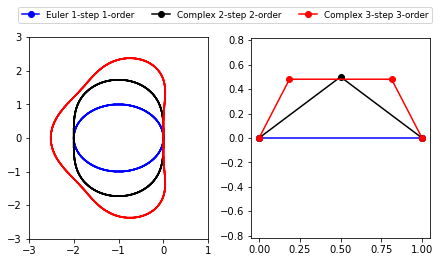

In [5]:
mosaic = """
    AABB
    """

#mosaic = [['A','A','B','B']]

fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(mosaic)

str1= 'A'
left = -3
right = 1
down = -3
up = 3

u = np.linspace(left, right, 1000)
v = np.linspace(down, up, 1000)

U, V = np.meshgrid(u, v)
complex_plane = U +1j*V
ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,0,0), colors='b')
ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,1/2,0), colors='k')
ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,1/2,1/6), colors='r')

str2 = 'B'

N = 2
x = np.linspace(0, 1, N)

ax_dict[str2].plot(x,x.imag,'b-o',label='Euler 1-step 1-order')
path2 = pathwise(x, 'Euler 2-step 2-order')
ax_dict[str2].plot(path2.real, path2.imag, 'k-o', label='Complex 2-step 2-order')
path3 = pathwise(x, 'Euler 3-step 3-order')
ax_dict[str2].plot(path3.real, path3.imag, 'r-o', label='Complex 3-step 3-order')
ax_dict[str2].set_ylim((-0.82,.82))
ax_dict[str1].set_aspect(0.75)
ax_dict[str2].set_aspect(0.75)
fig.legend( bbox_to_anchor=(1, 0.97), ncol =3, fontsize = 8.8)
plt.savefig('sec4_1.pdf', bbox_inches="tight")

# Graph 2: 3-step; 1st,2nd,3rd-order

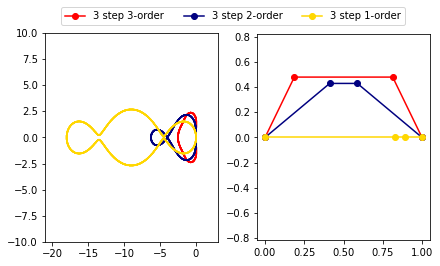

In [6]:
mosaic = """
    AABB
    """

mosaic = [['A','A','B','B']]


fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(mosaic)
str1= 'A'
left = -21
right = 3
down = -10
up = 10

u = np.linspace(left, right, 1000)
v = np.linspace(down, up, 1000)

U, V = np.meshgrid(u, v)
complex_plane = U +1j*V
ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,0.5,1/6), colors='r')
ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,0.5,1/16), colors='navy')
ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,0.148191715216932,0.005491662963826), colors='gold')

str2 = 'B'

N = 2
x = np.linspace(0, 1, N)

path1 = pathwise(x, 'Euler 3-step 3-order')
ax_dict[str2].plot(path1.real, path1.imag, 'r-o', label = '3 step 3-order')
path2 = pathwise(x, 'Euler 3-step 2-order')
ax_dict[str2].plot(path2.real, path2.imag, '-o', color='navy', label = '3 step 2-order')
path3 = pathwise(x, 'Euler 3-step 1-order')
ax_dict[str2].plot(path3.real, path3.imag, '-o', color = 'gold', label = '3 step 1-order')
ax_dict[str2].set_ylim((-0.82,.82))
ax_dict[str1].set_aspect(1.45)
ax_dict[str2].set_aspect(0.8)

fig.legend( bbox_to_anchor=(0.94, 0.97), ncol =3, fontsize = 10)
plt.savefig('sec4_2.pdf', bbox_inches="tight")

# Graph 3: Complex Eigenvalues

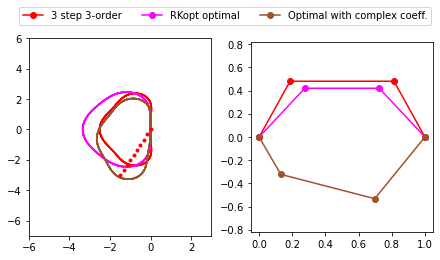

In [8]:
mosaic = """
    AABB
    """

#mosaic = [['A','A','B','B']]

fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(mosaic)
str1 = 'A'
left = -6
right = 3
down = -7
up = 6

u = np.linspace(left, right, 1000)
v = np.linspace(down, up, 1000)

U, V = np.meshgrid(u, v)
complex_plane = U +1j*V

ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,0.5,1/6), colors='r')
ax_dict[str1].contour(U,V,stab_rk3_opt(complex_plane,0.5,0.1134), colors='magenta')
ax_dict[str1].contour(U,V,stab_better_than_RKOPT(complex_plane,0.1134,-.06), colors='sienna')

x = np.linspace(0,1.5,10)
ax_dict[str1].plot(-1*x,-2*x,'r.')

srt2 = 'B'

N = 2
x = np.linspace(0, 1, N)

path1 = pathwise(x, 'Euler 3-step 3-order')
ax_dict[str2].plot(path1.real, path1.imag, 'r-o',  label = '3 step 3-order')
path2 = pathwise(x, 'Euler 3-step 2-order RKOPT')
ax_dict[str2].plot(path2.real, path2.imag, '-o', color='magenta', label = 'RKopt optimal')
path3 = pathwise(x, 'Euler 3-step 2-order better_than_RKOPT')
ax_dict[str2].plot(path3.real, path3.imag, '-o', color = 'sienna', label = 'Optimal with complex coeff.')
ax_dict[str2].set_ylim((-1,1.5))
ax_dict[str2].set_ylim((-0.82,.82))
ax_dict[str1].set_aspect(0.75)
ax_dict[str2].set_aspect(0.7)
fig.legend( bbox_to_anchor=(1, 0.97), ncol =3, fontsize = 10)
plt.savefig('sec4_3.pdf', bbox_inches="tight")